In [1]:
import time
import csv
import pandas as pd
from scapy.all import *

In [ ]:
# Reference - https://github.com/fisher85/ml-cybersecurity/blob/master/python-web-attack-detection/web-attack-detection.ipynb

In [3]:
# Compiling classical ML models on the engineered CSV file named Wednesday-workingHours.csv

In [2]:
# Change this based on CSV file location
csv_file = 'C:/Users/sinja/OneDrive/Desktop/submit/Wednesday-workingHours.csv'

file = pd.read_csv(csv_file)
file = file[file[' Label'].isin(['BENIGN', 'Heartbleed'])]

print(file)

         Destination Port   Flow Duration   Total Fwd Packets  \
0                      80           38308                   1   
1                     389             479                  11   
2                      88            1095                  10   
3                     389           15206                  17   
4                      88            1092                   9   
...                   ...             ...                 ...   
692698                 53           32215                   4   
692699                 53             324                   2   
692700              58030              82                   2   
692701                 53         1048635                   6   
692702                 53           94939                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             1                            6   
1                             5                          172   
2                          

In [8]:
from sklearn.utils import resample

benign = file[file[' Label'] == 'BENIGN']
heartbleed = file[file[' Label'] == 'Heartbleed']

target_benign_count = 20586

benign_downsampled = benign.sample(target_benign_count, random_state = 1)

target_heartbleed_count = target_benign_count // 2

heartbleed_upsampled = resample(heartbleed, replace = True, 
                                n_samples = target_heartbleed_count, random_state = 1)

file = pd.concat([benign_downsampled, heartbleed_upsampled])

print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file[' Label'].value_counts())

File columns:
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Lengt

In [9]:
import numpy as np

# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinite values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Performing one-hot encoding for string columns
string_features = list(file.select_dtypes(include = ['object']).columns)
string_features.remove(' Label')
file = pd.get_dummies(file, columns = string_features, drop_first = True)

In [10]:
# Extracting 'Label' as 'y'
y = file[' Label'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = [' Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'Heartbleed' 'Heartbleed']

X Values:
         Destination Port   Flow Duration   Total Fwd Packets  \
45729               50477               3                   2   
623191              43968              63                   1   
606712                 53          201955                   2   
690946                 80           15195                   1   
662832                 53           54270                   2   
...                   ...             ...                 ...   
597130                444       119302728                2685   
597130                444       119302728                2685   
597277                444       119297996                2782   
597277                444       119297996                2782   
597209                444       119261118                2794   

         Total Backward Packets  Total Length of Fwd Packets  \
45729                         0              

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'Heartbleed' 'Heartbleed']

X Values:
[[7.80930427e-01 3.33333411e-08 5.01092381e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.80229590e-01 5.33333458e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.19963798e-04 1.68296706e-03 5.01092381e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.86913068e-03 9.94150207e-01 1.39353791e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86913068e-03 9.94150207e-01 1.39353791e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86913068e-03 9.93842890e-01 1.39955102e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [12]:
# Splitting the dataset by Train-Test Split (70% train set and 30% test set)

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

# Converting to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("\nY Train value counts:")
print(y_train_series.value_counts())
print("\nY Test value counts:")
print(y_test_series.value_counts())

Y Train:
['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'Heartbleed']

X Train:
[[8.19963798e-04 1.89166711e-06 5.01092381e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.85638257e-01 2.22500052e-06 5.01092381e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.85365967e-03 4.16666764e-08 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.19963798e-04 2.58975060e-04 1.50327714e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.19963798e-04 8.26908526e-04 5.01092381e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86913068e-03 9.94138507e-01 1.40105430e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Y Test:
['BENIGN' 'BENIGN' 'Heartbleed' ... 'BENIGN' 'BENIGN' 'Heartbleed']

X Test:
[[8.19963798e-04 1.99358380e-04 5.01092381e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.19963798e-04 7.70708513e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86913068e-03 9.94189640e-01 1

In [13]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

import seaborn as sn 

Time consumed to fit model is  224.1701328754425
The best parameter is:
{'max_depth': 10, 'max_features': 1, 'n_estimators': 50}
Classification Report for Train Set:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     14418
  Heartbleed       1.00      1.00      1.00      7197

    accuracy                           1.00     21615
   macro avg       1.00      1.00      1.00     21615
weighted avg       1.00      1.00      1.00     21615

Classification Report for Test Set:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      6168
  Heartbleed       1.00      1.00      1.00      3096

    accuracy                           1.00      9264
   macro avg       1.00      1.00      1.00      9264
weighted avg       1.00      1.00      1.00      9264



Text(0.5, 1.0, 'Confusion Matrix - Random Forest (Test Set)')

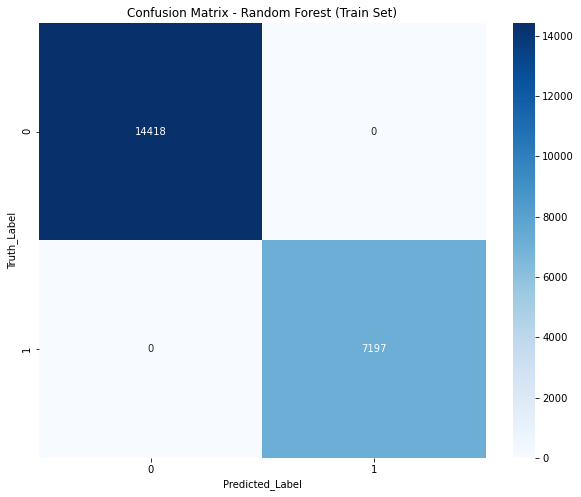

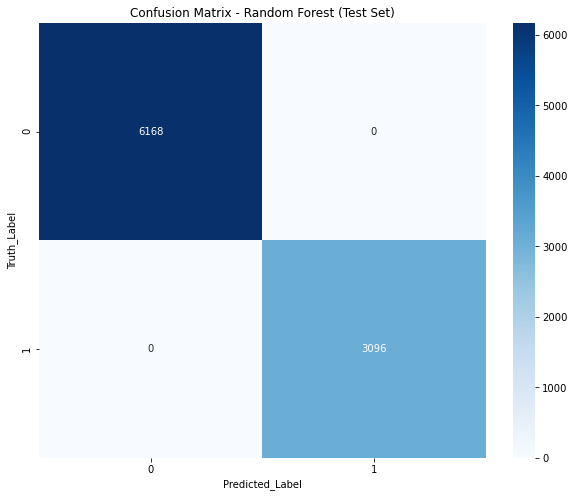

In [14]:
# Random Forest 

# Reference - https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

from sklearn.ensemble import RandomForestClassifier

# Calculating class weights
tot_samples = len(y_train)
benign_samples = len(y_train[y_train == 'BENIGN'])
heartbleed_samples = len(y_train[y_train == 'Heartbleed'])

class_weight_benign = tot_samples / (2 * benign_samples)
class_weight_heartbleed = tot_samples / (2 * heartbleed_samples)

class_weights = {'BENIGN': class_weight_benign, 
                 'Heartbleed': class_weight_heartbleed}

rfc = RandomForestClassifier(class_weight = class_weights,  
                             n_estimators = 100, 
                             max_depth = 20,
                             random_state = 4)

# Defining parameter range
param_grid = dict(max_features = np.arange(1, 4, 1), 
                  n_estimators = [50, 100, 150, 200], 
                  max_depth = np.arange(10, 30, 5))

# Parameter Description
# max_features = number of features to consider when looking for the best split
# n_estimators = number of trees in the forest

grid = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the train set
train_predictions = grid.predict(x_train)

print("Classification Report for Train Set:")
print(classification_report(y_train.ravel(), train_predictions))

# Plotting the Confusion Matrix for the train set
train_conf_matrix = confusion_matrix(y_train.ravel(), train_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(train_conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest (Train Set)')

# Predictions on the test set
test_predictions = grid.predict(x_test)

print("Classification Report for Test Set:")
print(classification_report(y_test.ravel(), test_predictions))

# Plotting the Confusion Matrix for the test set
test_conf_matrix = confusion_matrix(y_test.ravel(), test_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(test_conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')

Time consumed to fit model is  527.3841807842255
The best parameter is:
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report for Train Set:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     14418
  Heartbleed       1.00      1.00      1.00      7197

    accuracy                           1.00     21615
   macro avg       1.00      1.00      1.00     21615
weighted avg       1.00      1.00      1.00     21615

Classification Report for Test Set:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      6168
  Heartbleed       1.00      1.00      1.00      3096

    accuracy                           1.00      9264
   macro avg       1.00      1.00      1.00      9264
weighted avg       1.00      1.00      1.00      9264



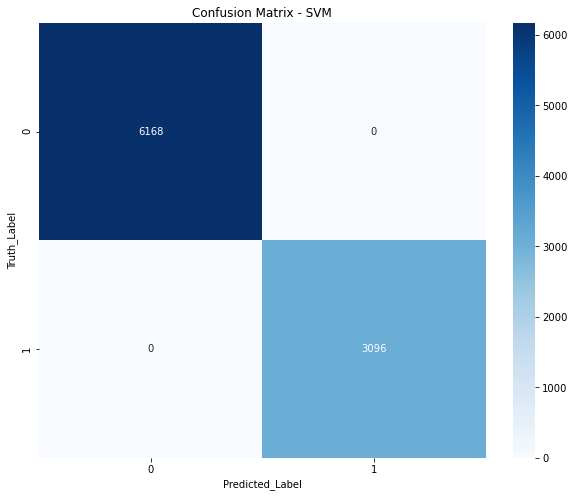

In [15]:
# SVM

# Reference - https://medium.com/swlh/hyperparameter-tuning-of-support-vector-machine-using-gridsearchcv-4d17671d1ed2

from sklearn.svm import SVC

# Calculating class weights
tot_samples = len(y_train)
benign_samples = len(y_train[y_train == 'BENIGN'])
heartbleed_samples = len(y_train[y_train == 'Heartbleed'])

class_weight_benign = tot_samples / (2 * benign_samples)
class_weight_heartbleed = tot_samples / (2 * heartbleed_samples)

class_weights = {'BENIGN': class_weight_benign, 
                 'Heartbleed': class_weight_heartbleed}

svc = SVC(class_weight = class_weights,
          probability = True,
          random_state = 4)

# Defining parameter range
param_grid = {'C': [0.1, 1],
              'gamma': [0.01, 0.1],
              'kernel': ['rbf', 'linear'],
             }

# Parameter Description
# C = governs the balance between maximizing the margin and minimizing classification errors
# gamma = influences the shape of the decision boundary

grid = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5)

start = time.time()

# Fitting the model for grid search
grid.fit(x_train, y_train.ravel())

end = time.time()

print("Time consumed to fit model is ", end - start)

print("The best parameter is:")
print(grid.best_params_)

# Predictions on the train set
train_predictions = grid.predict(x_train)

print("Classification Report for Train Set:")
print(classification_report(y_train.ravel(), train_predictions))

# Predictions on the test set
test_predictions = grid.predict(x_test)

print("Classification Report for Test Set:")
print(classification_report(y_test.ravel(), test_predictions))

# Plotting the Confusion Matrix for the test set
test_conf_matrix = confusion_matrix(y_test.ravel(), test_predictions)
plt.figure(figsize = (10, 8))
sn.heatmap(test_conf_matrix, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - SVM')
plt.show()

Time consumed to fit model is  190.14496040344238
Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'learning_rate_init': 0.1}
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      6168
  Heartbleed       1.00      1.00      1.00      3096

    accuracy                           1.00      9264
   macro avg       1.00      1.00      1.00      9264
weighted avg       1.00      1.00      1.00      9264



Text(0.5, 1.0, 'Confusion Matrix - Vanilla Neural Network')

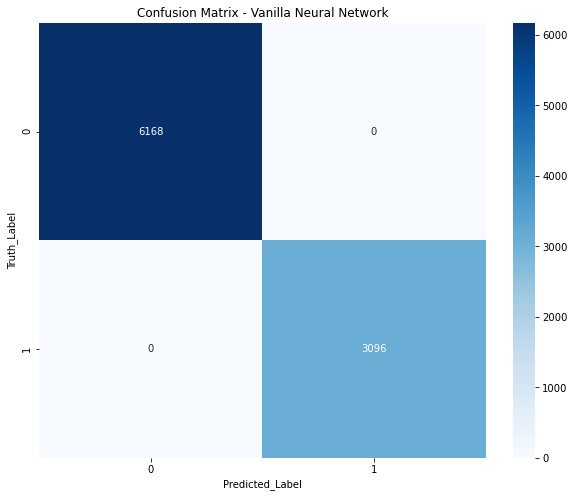

In [16]:
# Vanilla Neural Network 

# Reference - https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()

param_grid_2 = {'learning_rate': ['constant','adaptive'], 
                'learning_rate_init': [0.1, 1],
                'hidden_layer_sizes': [(100,), (200,)],
                'activation': ['relu']}

# Parameter Description
# learning_rate = schedule for weight updates
# learning_rate_init = the initial learning rate used
#                      controls the step-size in updating the weights
#                      only used when solver is ’sgd’ or ‘adam’
# hidden_layer_sizes = the ith element represents the number of neurons in the ith hidden layer
# activation = activation function for the hidden layer

mlp = GridSearchCV(estimator = mlpc, param_grid = param_grid_2, cv = 5)

start_2 = time.time()

# Fitting the model for grid search
mlp.fit(x_train, y_train.ravel())

end_2 = time.time()

print("Time consumed to fit model is ", end_2 - start_2)

print('Best parameters found:\n', mlp.best_params_)

# Predictions on the test set
mlp_predictions = mlp.predict(x_test)

print(classification_report(y_test.ravel(), mlp_predictions))

# Plotting the Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test.ravel(), mlp_predictions)
plt.figure(figsize = (10,8))
sn.heatmap(conf_matrix_2, annot = True, cmap = 'Blues',  fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Vanilla Neural Network')

In [ ]:
# Compiling DL models on a CSV file that combines PCAP data from Wednesday-WorkingHours.pcap
# with attack labels from an engineered CSV file named Wednesday-workingHours.csv

In [1]:
# Change this based on PCAP and CSV file location
pcap_file = 'C:/Users/sinja/Desktop/submit/Wednesday-WorkingHours.pcap'
csv_file = 'C:/Users/sinja/Desktop/submit/Wednesday-workingHours.csv'

# Storing data from CSV file in a dictionary
data = {}

with open(csv_file, 'r') as file:
    read = csv.DictReader(file)
    for row in read:
        key = (row[' Destination Port'])
        data[key] = row[' Label']

# Storing dataframes in a dictionary for each data type
dataframe = {}

def extract_features(packet):
    timestamp = packet.time
    
    # IP-related variables
    source_ip = None
    destination_ip = None
    src_port = None
    dst_port = None
    
    # Checking for the presence of an IP packet
    if IP in packet:
        source_ip = packet[IP].src
        destination_ip = packet[IP].dst
    
    # Checking for the presence of a TCP or UDP packet
    if TCP in packet:
        src_port = packet[TCP].sport
        dst_port = packet[TCP].dport 
    elif UDP in packet:
        src_port = packet[UDP].sport
        dst_port = packet[UDP].dport
    
    packet_length = len(packet)

    # Finding the data label based on the current packet attributes
    key = (str(dst_port))
    data_label = data.get(key, 'BENIGN')

    return [timestamp, source_ip, destination_ip, src_port, dst_port, packet_length, data_label]

for packet in PcapReader(pcap_file):
    features = extract_features(packet)
    data_label = features[-1] 
    
    if data_label not in dataframe:
        dataframe[data_label] = []

    dataframe[data_label].append(features)

# Creating seperate dataframes for each data type
for data_label, packets in dataframe.items():
    dataframe[data_label] = pd.DataFrame(packets, columns = ['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port', 
                                                             'Destination_Port', 'Packet_Length', 
                                                             'Attack_Label'])

# Combining all dataframes 
dataset = pd.concat(dataframe.values())

# Saving the combined dataset to a CSV file
dataset.to_csv('dataset_1.csv', index = False)

print('Combined dataset saved as dataset_1.csv')

Combined dataset saved as dataset_1.csv


In [2]:
file = pd.read_csv('dataset_1.csv')
print(file)

             Timestamp      Source_IP   Destination_IP  Source_Port  \
0         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
1         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
2         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
3         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
4         1.499255e+09  192.168.10.15  239.255.255.250      49792.0   
...                ...            ...              ...          ...   
13788873  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788874  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788875  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788876  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   
13788877  1.499280e+09     172.16.0.1    192.168.10.51      45022.0   

          Destination_Port  Packet_Length Attack_Label  
0                   1900.0            179       BENIGN  
1                   1900.0       

In [3]:
print("File columns:")
print(file.columns)

print("\nData value counts:")
print(file['Attack_Label'].value_counts())

File columns:
Index(['Timestamp', 'Source_IP', 'Destination_IP', 'Source_Port',
       'Destination_Port', 'Packet_Length', 'Attack_Label'],
      dtype='object')

Data value counts:
BENIGN           9642001
DoS GoldenEye    4118430
Heartbleed         28447
Name: Attack_Label, dtype: int64


In [5]:
import random
from sklearn.utils import shuffle

# Removing DoS GoldenEye attack
file = file[file['Attack_Label'] != 'DoS GoldenEye']

benign_tot = len(file[file['Attack_Label'] == "BENIGN"])
attack_tot = len(file[file['Attack_Label'] != "BENIGN"])

enlargement = 1.1

benign_inc_max = attack_tot / 30 * 70
benign_inc_prob = (benign_inc_max / benign_tot) * enlargement

indexes = []
benign_inc_cnt = 0

for index, row in file.iterrows():
    if (row['Attack_Label'] != "BENIGN"):
        indexes.append(index)
        
    else:
        # Copying with benign_inc_prob
        if random.random() > benign_inc_prob: 
            continue
            
        # Have we achieved 70% ?
        if benign_inc_cnt > benign_inc_max: 
            continue
            
        benign_inc_cnt += 1
        indexes.append(index)
        
file_balanced = file.loc[indexes]

# Shuffling the data
file_shuffled = shuffle(file_balanced, random_state = 42)

file_shuffled['Attack_Label'].value_counts()

BENIGN        66377
Heartbleed    28447
Name: Attack_Label, dtype: int64

In [6]:
file_shuffled.to_csv("balanced and shuffled (benign & heartbleed).csv", index = False)

In [2]:
file = pd.read_csv('balanced and shuffled (benign & heartbleed).csv')

In [3]:
import numpy as np

# Replacing non-numerical values
file.replace('Infinity', -1, inplace = True)

# Replacing NaN and Infinity values with -1
file.replace([np.inf, -np.inf, np.nan], -1, inplace = True)

# Performing one-hot encoding for string columns
string_features = list(file.select_dtypes(include = ['object']).columns)
string_features.remove('Attack_Label')
file = pd.get_dummies(file, columns = string_features, drop_first = True)

In [4]:
# Extracting 'Attack_Label' as 'y'
y = file['Attack_Label'].values

# Extracting remaining columns as 'x'
x = file.drop(columns = ['Timestamp', 'Attack_Label'])

print("Before Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

Before Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'BENIGN' 'BENIGN']

X Values:
       Source_Port  Destination_Port  Packet_Length  Source_IP_1.234.58.131  \
0            443.0           41663.0           2974                       0   
1          46101.0             443.0             97                       0   
2            443.0           54320.0           1514                       0   
3          45022.0             444.0             66                       0   
4             80.0           49533.0           1514                       0   
...            ...               ...            ...                     ...   
94819      49329.0             443.0             60                       0   
94820      37332.0             443.0             66                       0   
94821      45022.0             444.0             66                       0   
94822         80.0           49533.0           2974                       0   
94823        443.0           

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fitting and transforming the features using Min-Max Scaling
x = scaler.fit_transform(x)

print("After Scaling:")
print("\nY Values:")
print(y)
print("\nX Values:")
print(x)

After Scaling:

Y Values:
['BENIGN' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'BENIGN' 'BENIGN']

X Values:
[[6.77490234e-03 6.35975089e-01 2.19229612e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.03460693e-01 6.77738430e-03 2.78362925e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.77490234e-03 8.29176334e-01 1.09389106e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.86996460e-01 6.79264868e-03 4.51399338e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 7.56105752e-01 2.19229612e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.77490234e-03 6.68686653e-01 4.51399338e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [6]:
# Splitting the dataset by Train-Test Split (70% train set and 30% test set)

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 42)

print("Y Train:")
print(y_train)
print("\nX Train:")
print(x_train)

print("\nY Test:")
print(y_test)
print("\nX Test:")
print(x_test)

# Converting to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("\nY Train value counts:")
print(y_train_series.value_counts())
print("\nY Test value counts:")
print(y_test_series.value_counts())

Y Train:
['Heartbleed' 'BENIGN' 'BENIGN' ... 'Heartbleed' 'Heartbleed' 'Heartbleed']

X Train:
[[6.86996460e-01 6.79264868e-03 4.51399338e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 7.56105752e-01 2.19229612e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 5.96638784e-01 1.05326512e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.86996460e-01 6.79264868e-03 4.51399338e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86996460e-01 6.79264868e-03 4.51399338e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86996460e-01 6.79264868e-03 4.51399338e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Y Test:
['Heartbleed' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'BENIGN']

X Test:
[[6.86996460e-01 6.79264868e-03 4.51399338e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.77490234e-03 8.55797411e-01 1.09389106e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.23596191e-03 9.047960

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

In [8]:
# Defining the fixed sequence length
sequence_length = 5 # for models excluding 1D CNN 
# sequence_length = 2 # for 1D CNN

# Reshaping the data into sequences with the specified sequence length
def create_sequences(data, labels, sequence_length):
    num_sequences = len(data) - sequence_length + 1
    x_sequences, y_sequences = [], []
    
    for i in range(num_sequences):
        x_sequences.append(data[i : i + sequence_length])
        y_sequences.append(labels[i + sequence_length - 1])
        
    return np.array(x_sequences), np.array(y_sequences)

Epoch 1/10
4149/4149 [==============================] - 140s 33ms/step - loss: 0.0170 - accuracy: 0.9929 - val_loss: 1.3787e-04 - val_accuracy: 1.0000
Epoch 2/10
4149/4149 [==============================] - 95s 23ms/step - loss: 2.6372e-05 - accuracy: 1.0000 - val_loss: 1.6451e-05 - val_accuracy: 1.0000
Epoch 3/10
4149/4149 [==============================] - 97s 23ms/step - loss: 1.0072e-04 - accuracy: 1.0000 - val_loss: 2.0952e-06 - val_accuracy: 1.0000
Epoch 4/10
4149/4149 [==============================] - 95s 23ms/step - loss: 1.6275e-06 - accuracy: 1.0000 - val_loss: 4.1127e-07 - val_accuracy: 1.0000
Epoch 5/10
4149/4149 [==============================] - 92s 22ms/step - loss: 2.3186e-07 - accuracy: 1.0000 - val_loss: 6.9855e-08 - val_accuracy: 1.0000
Epoch 6/10
4149/4149 [==============================] - 97s 23ms/step - loss: 3.6019e-08 - accuracy: 1.0000 - val_loss: 5.7543e-09 - val_accuracy: 1.0000
Epoch 7/10
4149/4149 [==============================] - 97s 23ms/step - loss: 2

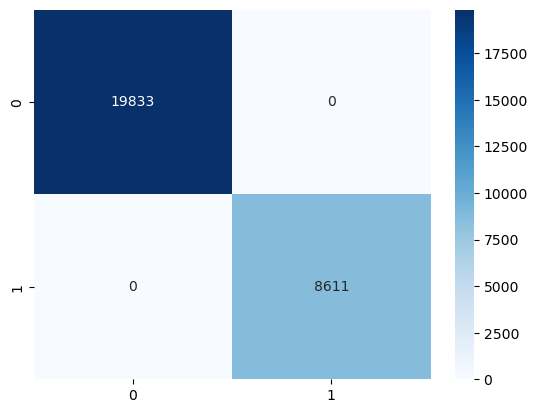

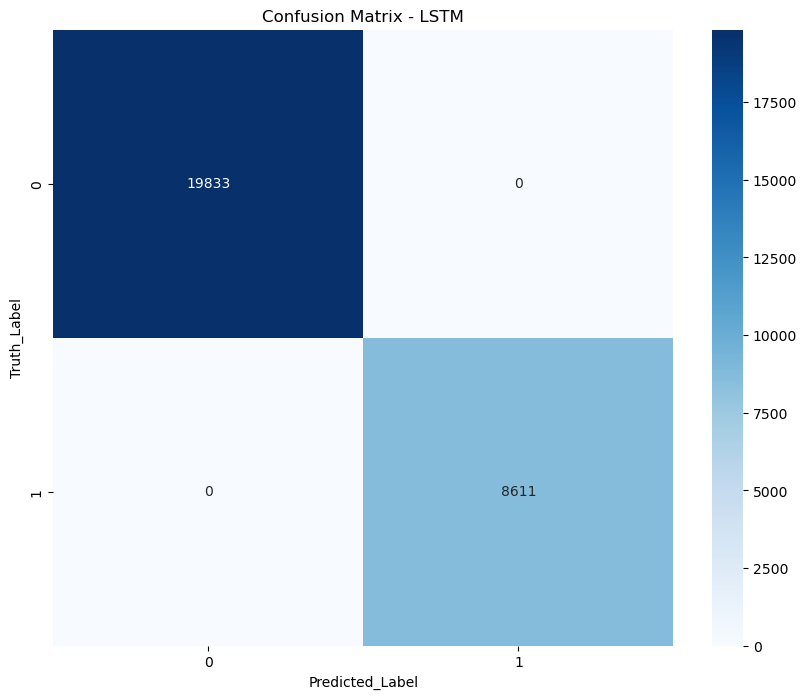

In [10]:
# Long Short-Term Memory

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(LSTM(units = 50, input_shape = (sequence_length, x_train.shape[2])))
model.add(Dense(units = num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

# Training the model
history = model.fit(x_train, y_train_encoded, epochs = 10, batch_size = 16, validation_data = (x_test, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - LSTM')
plt.show()

Epoch 1/10
4149/4149 [==============================] - 112s 19ms/step - loss: 0.0130 - accuracy: 0.9967 - val_loss: 1.0735e-04 - val_accuracy: 1.0000
Epoch 2/10
4149/4149 [==============================] - 44s 10ms/step - loss: 3.2963e-05 - accuracy: 1.0000 - val_loss: 1.5547e-05 - val_accuracy: 1.0000
Epoch 3/10
4149/4149 [==============================] - 45s 11ms/step - loss: 3.3130e-06 - accuracy: 1.0000 - val_loss: 2.3578e-06 - val_accuracy: 1.0000
Epoch 4/10
4149/4149 [==============================] - 46s 11ms/step - loss: 3.9284e-07 - accuracy: 1.0000 - val_loss: 4.8898e-07 - val_accuracy: 1.0000
Epoch 5/10
4149/4149 [==============================] - 46s 11ms/step - loss: 9.8083e-05 - accuracy: 1.0000 - val_loss: 2.0196e-07 - val_accuracy: 1.0000
Epoch 6/10
4149/4149 [==============================] - 44s 10ms/step - loss: 1.3968e-07 - accuracy: 1.0000 - val_loss: 1.4934e-07 - val_accuracy: 1.0000
Epoch 7/10
4149/4149 [==============================] - 47s 11ms/step - loss: 8

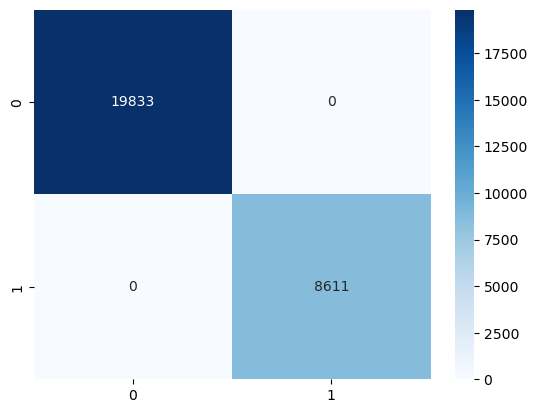

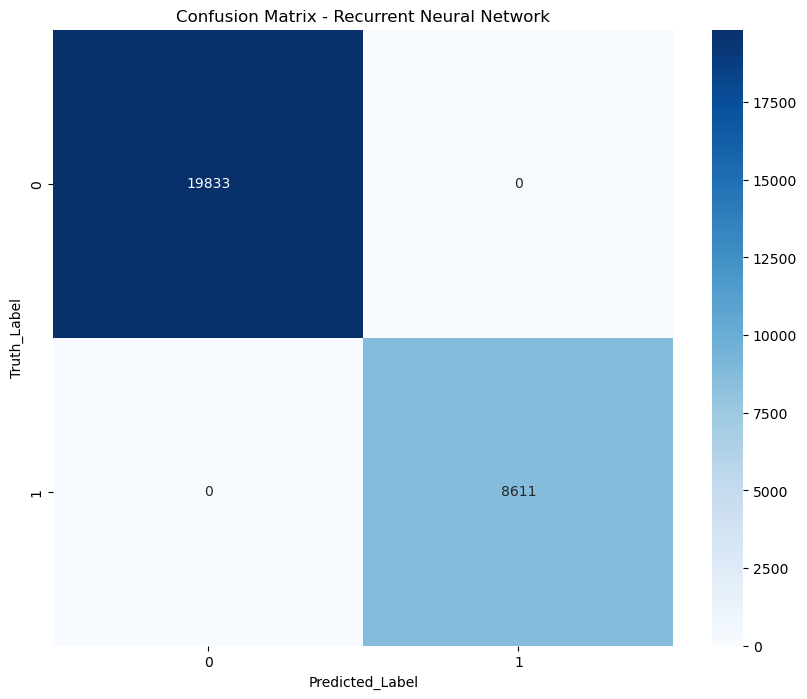

In [10]:
# Recurrent Neural Network

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model 
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape = (sequence_length, x_train.shape[2])))
model.add(Dense(units = num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

# Training the model
history = model.fit(x_train, y_train_encoded, epochs = 10, batch_size = 16, validation_data = (x_test, y_test_encoded))

end = time.time()

print("Time consumed to fit model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Recurrent Neural Network')
plt.show()

Epoch 1/10
4149/4149 [==============================] - 23s 5ms/step - loss: 0.3188 - accuracy: 0.7824 - val_loss: 0.3050 - val_accuracy: 0.7936
Epoch 2/10
4149/4149 [==============================] - 13s 3ms/step - loss: 0.2981 - accuracy: 0.7989 - val_loss: 0.2944 - val_accuracy: 0.7903
Epoch 3/10
4149/4149 [==============================] - 13s 3ms/step - loss: 0.2894 - accuracy: 0.8052 - val_loss: 0.2967 - val_accuracy: 0.7918
Epoch 4/10
4149/4149 [==============================] - 13s 3ms/step - loss: 0.2842 - accuracy: 0.8087 - val_loss: 0.2974 - val_accuracy: 0.7918
Epoch 5/10
4149/4149 [==============================] - 13s 3ms/step - loss: 0.2801 - accuracy: 0.8104 - val_loss: 0.3070 - val_accuracy: 0.7920
Epoch 6/10
4149/4149 [==============================] - 13s 3ms/step - loss: 0.2768 - accuracy: 0.8145 - val_loss: 0.3104 - val_accuracy: 0.7917
Epoch 7/10
4149/4149 [==============================] - 13s 3ms/step - loss: 0.2744 - accuracy: 0.8131 - val_loss: 0.3203 - val_ac

Text(0.5, 1.0, 'Confusion Matrix - Convolutional Neural Network')

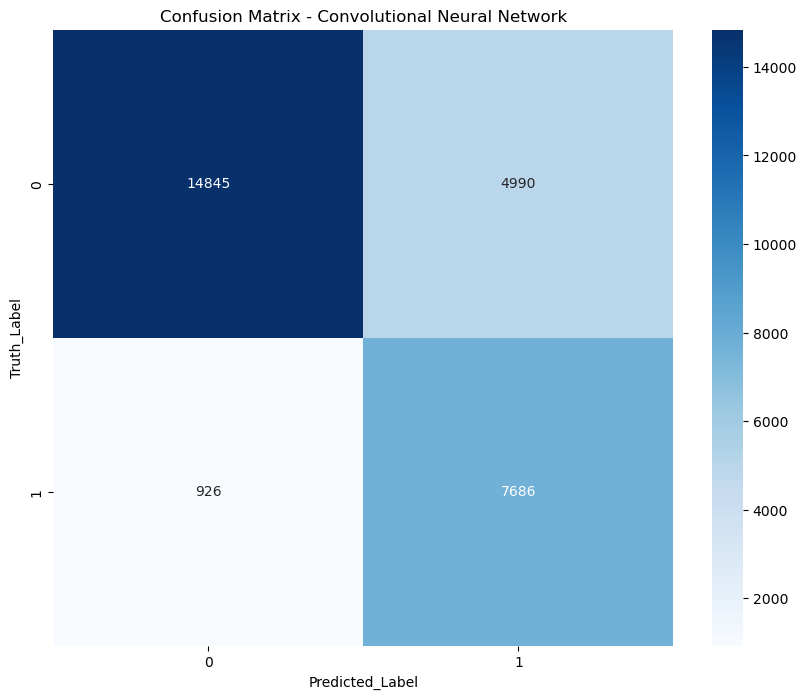

In [9]:
# Convolutional Neural Network - 1D

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

num_features = x_train.shape[-1]

# Reshaping the data 
x_train_cnn = x_train.reshape(-1, sequence_length, num_features)
x_test_cnn = x_test.reshape(-1, sequence_length, num_features)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model 
model = Sequential()
model.add(Conv1D(32, kernel_size = 1, activation = 'relu', input_shape = (sequence_length, num_features)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

history = model.fit(x_train_cnn, y_train_encoded, epochs = 10, batch_size = 16,
                    validation_data = (x_test_cnn, y_test_encoded))

end = time.time()

print("Time consumed to fit CNN model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Convolutional Neural Network')

Epoch 1/10
4149/4149 [==============================] - 104s 19ms/step - loss: 0.6115 - accuracy: 0.7011 - val_loss: 0.6144 - val_accuracy: 0.6973
Epoch 2/10
4149/4149 [==============================] - 50s 12ms/step - loss: 0.5989 - accuracy: 0.7022 - val_loss: 0.6249 - val_accuracy: 0.6939
Epoch 3/10
4149/4149 [==============================] - 55s 13ms/step - loss: 0.5592 - accuracy: 0.7249 - val_loss: 0.6666 - val_accuracy: 0.6715
Epoch 4/10
4149/4149 [==============================] - 51s 12ms/step - loss: 0.5157 - accuracy: 0.7522 - val_loss: 0.7049 - val_accuracy: 0.6561
Epoch 5/10
4149/4149 [==============================] - 51s 12ms/step - loss: 0.4739 - accuracy: 0.7731 - val_loss: 0.7881 - val_accuracy: 0.6479
Epoch 6/10
4149/4149 [==============================] - 50s 12ms/step - loss: 0.4387 - accuracy: 0.7913 - val_loss: 0.8937 - val_accuracy: 0.6048
Epoch 7/10
4149/4149 [==============================] - 51s 12ms/step - loss: 0.4074 - accuracy: 0.8076 - val_loss: 0.9606 

Text(0.5, 1.0, 'Confusion Matrix - Convolutional Neural Network')

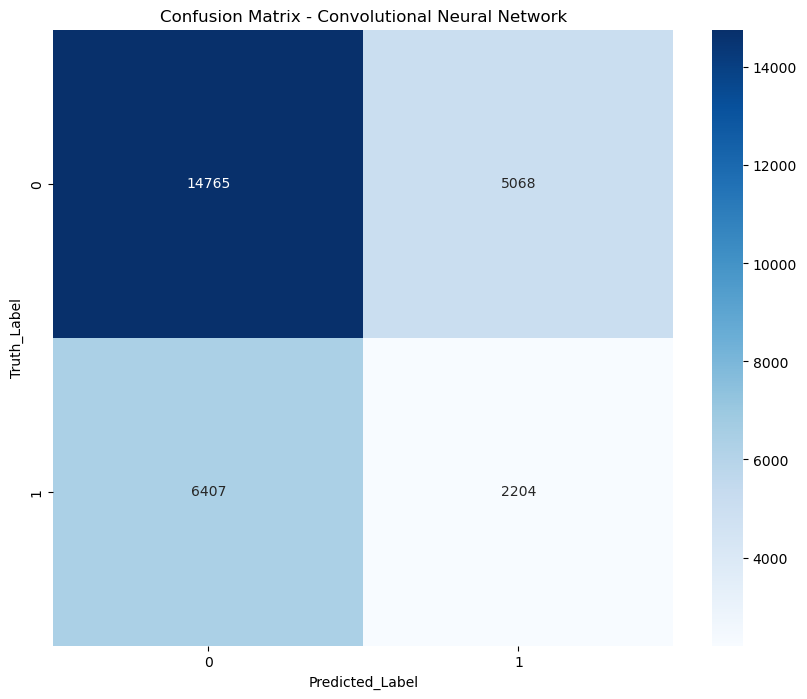

In [10]:
# Convolutional Neural Network - 2D

x_train, y_train = create_sequences(x_train, y_train, sequence_length)
x_test, y_test = create_sequences(x_test, y_test, sequence_length)

num_features = x_train.shape[-1]

# Reshaping the data 
x_train_cnn = x_train.reshape(-1, 1, sequence_length, num_features)
x_test_cnn = x_test.reshape(-1, 1, sequence_length, num_features)

# Encoding labels using LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

# Converting labels to one-hot encoding for both training and testing data
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)

# Defining the model
model = Sequential()
model.add(Conv2D(32, kernel_size = (1, 3), activation = 'relu', input_shape = (1, sequence_length, num_features)))
model.add(MaxPooling2D(pool_size = (1, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start = time.time()

history = model.fit(x_train_cnn, y_train_encoded, epochs = 10, batch_size = 16, 
                    validation_data = (x_test_cnn, y_test_encoded))

end = time.time()

print("Time consumed to fit CNN model is ", end - start)

# Predicting by using the trained model
y_pred = model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test_encoded, axis = 1)

# Generating the Confusion Matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

print("Classification Report - CNN:")
print(classification_report(y_true, y_pred_classes, zero_division = 0))

# Plotting the Confusion Matrix
plt.figure(figsize = (10, 8))
sn.heatmap(confusion_mat, annot = True, cmap = 'Blues', fmt = 'd', cbar = True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Convolutional Neural Network')